# Jennifer's LSTM
(follows after EDA code chunks)

Based on [this implementation](https://www.digitalocean.com/community/tutorials/weather-forecast-using-ltsm-networks).
I feel like the train-test split it super sus but I don't even really know how the functions work so...

In [ ]:
from tensorflow import keras

In [ ]:
def train_test_data(data, lag, prediction_lag, sampling_rate):

    training_size = int(0.8 * data.shape[0])  
    train_data = data.loc[0 : training_size - 1]
    val_data = data.loc[training_size:]
    sequence_length = int(lag / sampling_rate)

    # training dataset
    start = lag + prediction_lag
    end = start + training_size

    x_train = train_data.drop(columns=['date_time', 'relative_humidity']).values
    y_train = data.iloc[start:end][['relative_humidity']].values
    
    # validation dataset
    val_start = training_size + start
    val_end = len(val_data)

    val_start = training_size + start
    val_end = len(val_data) - start

    x_val = val_data.drop(columns=['date_time', 'relative_humidity']).iloc[:val_end].values
    y_val = data.iloc[val_start:][['relative_humidity']].values

    return x_train, y_train, x_val, y_val, sequence_length


In [ ]:
def get_datasets(data, lag, prediction_lag, sampling_rate, batch_size):

    x_train, y_train, x_val, y_val, sequence_length = train_test_data(data, lag, prediction_lag, sampling_rate)

    dataset_train = keras.preprocessing.timeseries_dataset_from_array(
        data = x_train,
        targets = y_train,
        sequence_length = sequence_length,
        sampling_rate = sampling_rate,
        batch_size = batch_size,
    )

    # validation dataset

    dataset_val = keras.preprocessing.timeseries_dataset_from_array(
        data = x_val,
        targets = y_val,
        sequence_length = sequence_length,
        sampling_rate = sampling_rate,
        batch_size = batch_size,
    )

    return dataset_train, dataset_val, sequence_length

In [ ]:
def train_LSTM_model(data, lag, prediction_lag, sampling_rate, batch_size, neurons_per_layer):
    
    dataset_train, dataset_val, sequence_length = get_datasets(data, lag, prediction_lag, sampling_rate, batch_size)

    for batch in dataset_train.take(1):
        inputs, targets = batch
    
    inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    lstm_out = keras.layers.LSTM(neurons_per_layer)(inputs)
    lstm_out = keras.layers.LSTM(neurons_per_layer)(inputs)
    outputs = keras.layers.Dense(1)(lstm_out)

    model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()

    return dataset_train, dataset_val, model

In [ ]:
np.random.seed(1244)

In [ ]:
x_train, y_train, x_val, y_val, sequence_length = train_test_data(df_final, 72, 1, 1) # lag = 72, prediction_lag = 1, sampling_rate = 1
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(80045, 8) (80045, 1) (19939, 8) (19939, 1)


In [ ]:
model = None
dataset_train, dataset_val, model = train_LSTM_model(df_final, 72, 1, 1, 64, 32)

2025-03-24 00:30:45.938317: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Model: "Weather_forcaster"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 72, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data = dataset_val
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0284 - val_loss: 0.0112
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0058 - val_loss: 0.0094
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0053 - val_loss: 0.0085
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0051 - val_loss: 0.0081
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0049 - val_loss: 0.0079
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0047 - val_loss: 0.0082
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0045 - val_loss: 0.0087
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0044 - val_loss: 0.0089


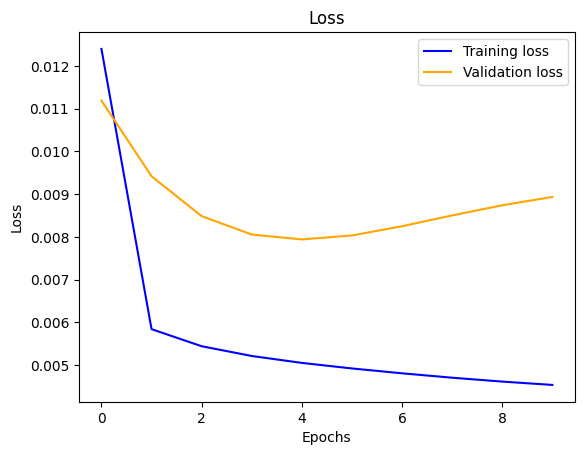

In [ ]:
loss = history.history["loss"]
vol_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, label="Training loss", color="blue")
plt.plot(epochs, vol_loss, label="Validation loss", color="orange")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
fitted_train = model.predict(dataset_train)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


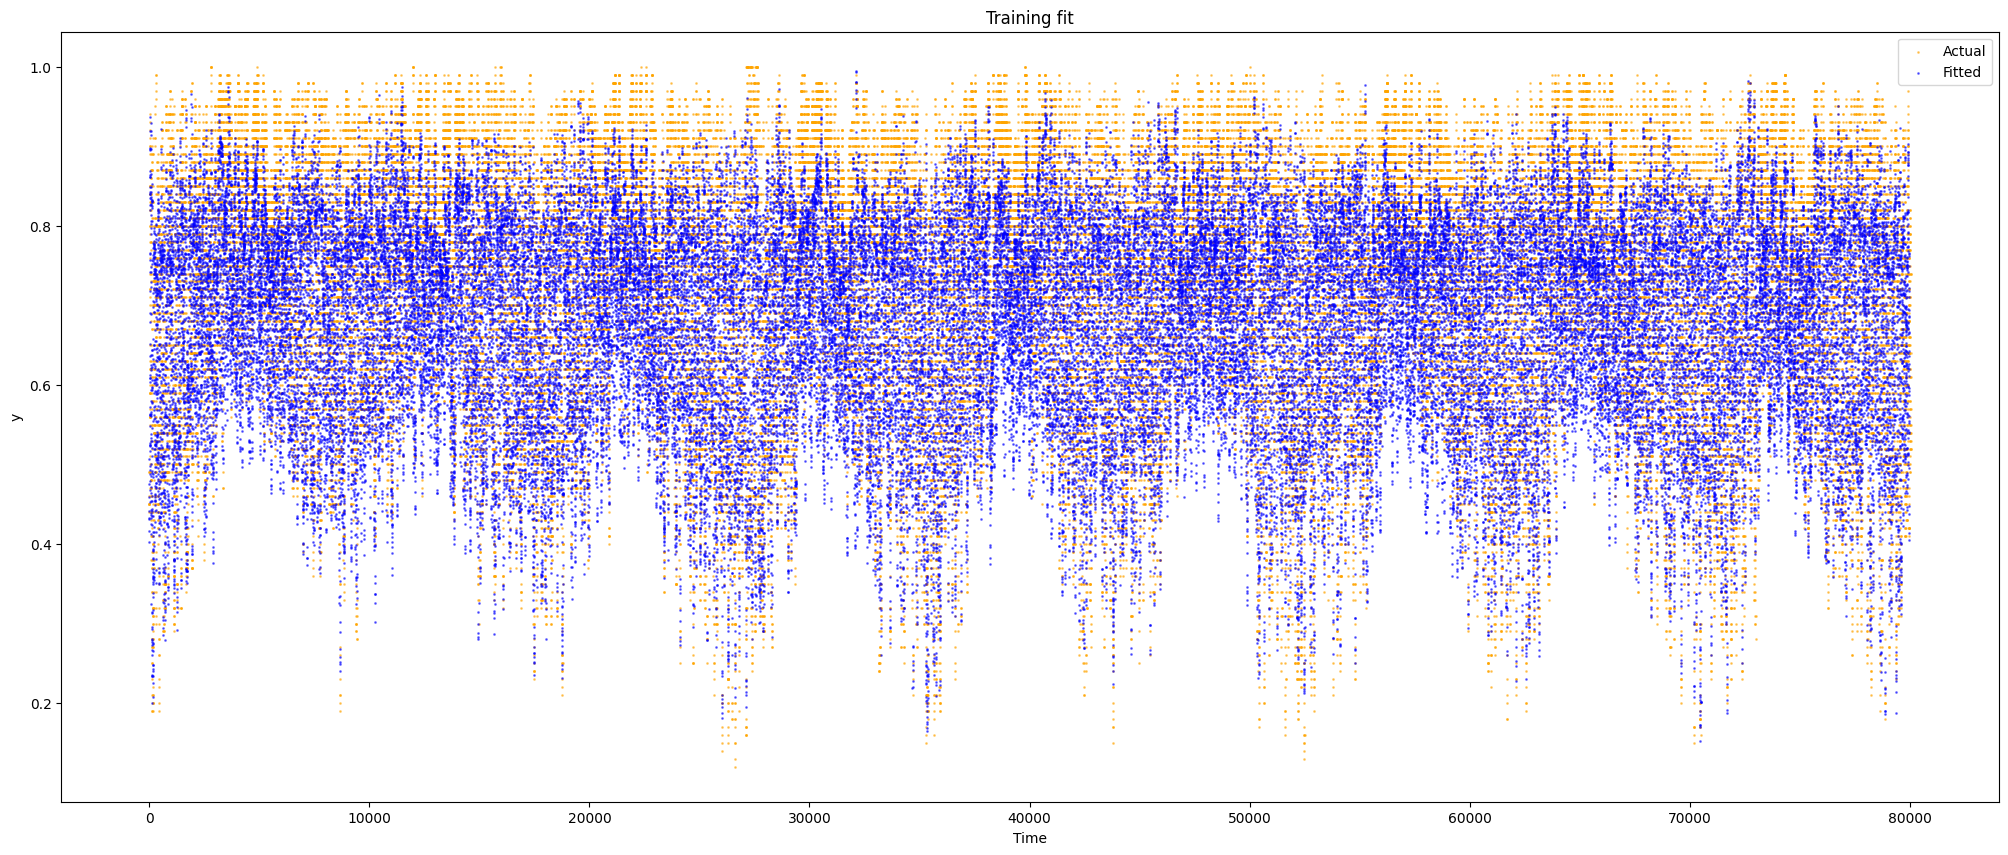

In [ ]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(y_train)), y_train, label="Actual", color="orange", alpha=0.5, s=1)
plt.scatter(range(len(fitted_train)), fitted_train, label="Fitted", color="blue", alpha=0.5, s=1)
plt.title("Training fit")
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
fitted_val = model.predict(dataset_val)

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


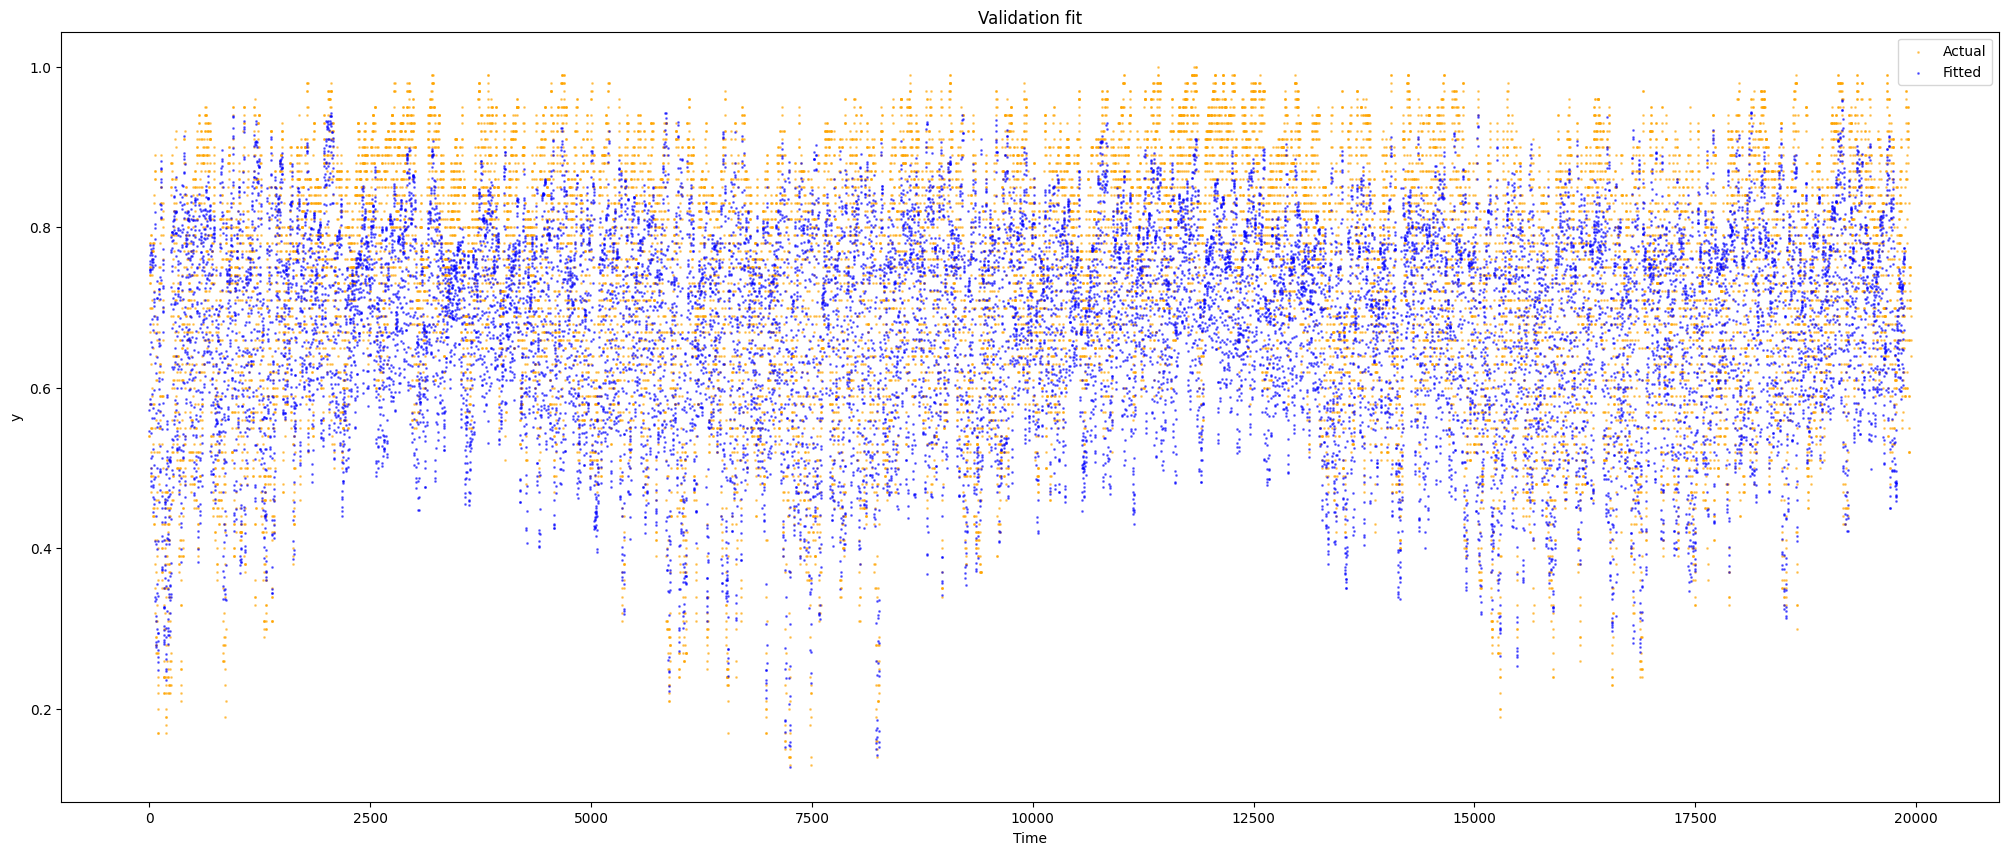

In [ ]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(y_val)), y_val, label="Actual", color="orange", alpha=0.5, s=1)
plt.scatter(range(len(fitted_val)), fitted_val, label="Fitted", color="blue", alpha=0.5, s=1)
plt.title("Validation fit")
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()
plt.show()